# Importing libraries and Loading the Dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data_path = 'Airbnb_Open_Data.csv'
df = pd.read_csv(data_path, encoding="unicode_escape")
df.shape

<ipython-input-2-e550dc6a26e8>:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, encoding="unicode_escape")


(102599, 26)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [4]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.dtypes


,0
id,int64
NAME,object
host id,int64
host_identity_verified,object
host name,object
neighbourhood group,object
neighbourhood,object
lat,float64
long,float64
country,object


In [6]:
df.shape


(102599, 26)

# Checking the Duplicate and Missing Values in the Dataset:

In [7]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(102058, 26)

In [8]:
missing_values = df.isnull().sum()
missing_values

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,404
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [9]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.020580e+05,1.020580e+05,102050.000000,102050.000000,101844.000000,101658.000000,101875.000000,86240.000000,101739.000000,101739.000000,101610.000000
mean,2.918438e+07,4.926738e+10,40.728097,-73.949652,2012.488090,8.126640,27.517948,1.375408,3.278733,7.936937,141.043992
std,1.627173e+07,2.853742e+10,0.055852,0.049502,5.765838,30.616698,49.571744,1.748019,1.285089,32.266355,135.429156
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.509286e+07,2.459924e+10,40.688730,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.918438e+07,4.912865e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.327590e+07,7.400619e+10,40.762760,-73.932350,2017.000000,5.000000,31.000000,2.010000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   NAME                            101808 non-null  object 
 2   host id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host name                       101654 non-null  object 
 5   neighbourhood group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   country                         101526 non-null  object 
 10  country code                    101927 non-null  object 
 11  instant_bookable                101953 non-null  object 
 12  cancellation_policy  

# Handling Missing Data

In [11]:
# Dropping columns that are less relevant for price prediction
# We created a variable called 'data_cleaned' to clean data and handle missing data
columns_to_drop = ['id', 'host id', 'host name', 'license', 'last review', 'NAME','service fee']
data_cleaned = df.drop(columns=columns_to_drop)

In [12]:
# For columns with numerical data, we can consider filling missing values with the median or mean
numerical_columns = ['Construction year', 'minimum nights', 'number of reviews',
                     'reviews per month', 'review rate number', 'calculated host listings count',
                     'availability 365']
for col in numerical_columns:
    data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

In [13]:
# For categorical columns, we can consider filling missing values with the mode
categorical_columns = ['host_identity_verified', 'neighbourhood group', 'neighbourhood',
                       'country', 'country code', 'instant_bookable', 'cancellation_policy',
                       'room type', 'house_rules']
for col in categorical_columns:
    data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)

In [14]:
# Removing rows with missing 'price'
data_cleaned = data_cleaned.dropna(subset=['price'])


In [15]:
#we need to convert 'price' to numerical values
# Removing the dollar sign and converting to float
data_cleaned['price'] = data_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)

<ipython-input-15-17fc29c097c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['price'] = data_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)


In [16]:
# Interpolating 'lat' and 'long' based on 'neighbourhood'
# Grouping by 'neighbourhood' and calculating the mean 'lat' and 'long'
mean_coords = data_cleaned.groupby('neighbourhood')[['lat', 'long']].mean()

# Applying the mean coordinates to missing values
data_cleaned = data_cleaned.set_index('neighbourhood')
data_cleaned['lat'].fillna(mean_coords['lat'], inplace=True)
data_cleaned['long'].fillna(mean_coords['long'], inplace=True)
data_cleaned.reset_index(inplace=True)

In [17]:
# Checking the dataset after handling missing values
data_cleaned.isnull().sum(), data_cleaned.shape

(neighbourhood                     0
 host_identity_verified            0
 neighbourhood group               0
 lat                               0
 long                              0
 country                           0
 country code                      0
 instant_bookable                  0
 cancellation_policy               0
 room type                         0
 Construction year                 0
 price                             0
 minimum nights                    0
 number of reviews                 0
 reviews per month                 0
 review rate number                0
 calculated host listings count    0
 availability 365                  0
 house_rules                       0
 dtype: int64,
 (101811, 19))

# Exploratory Data Analysis(EDA)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Setting up the aesthetics for the plots
sns.set(style="whitegrid")

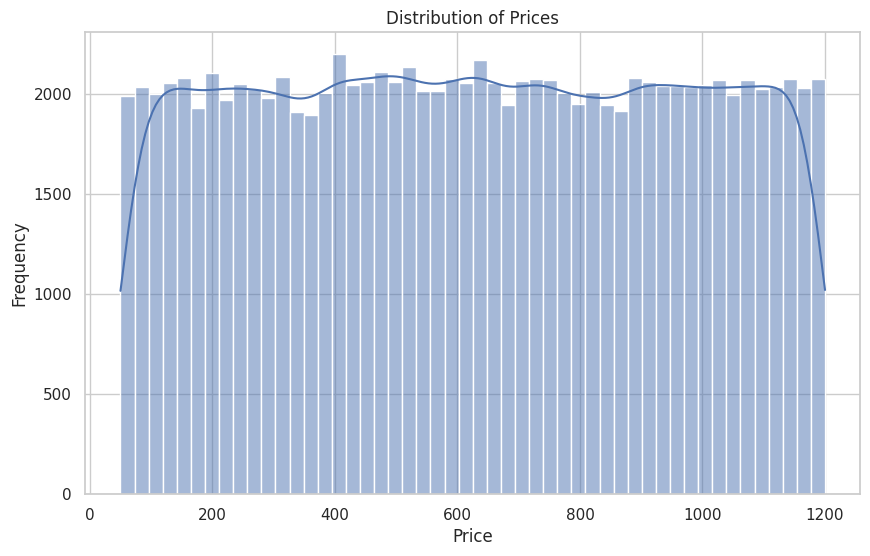

In [20]:
# Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['price'], kde=True, bins=50)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

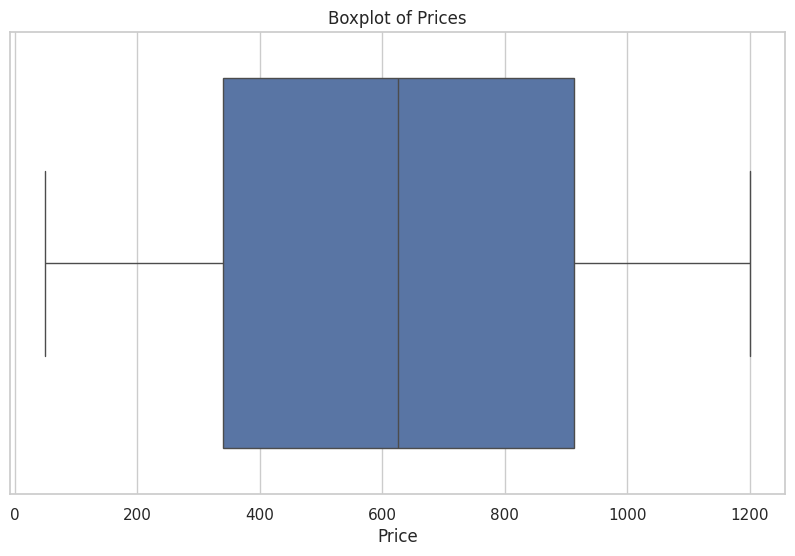

In [21]:
# Boxplot for Prices (to identify outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['price'])
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()

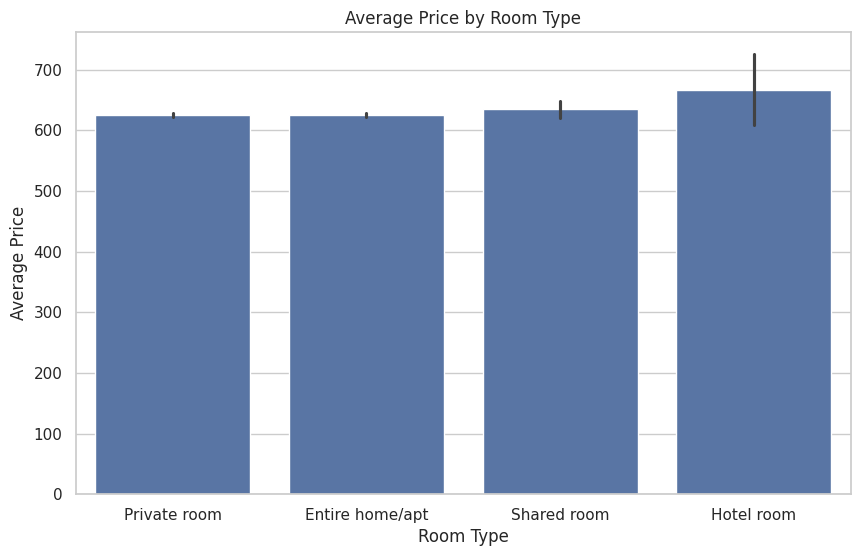

In [22]:
# Room Type vs Price
plt.figure(figsize=(10, 6))
sns.barplot(x='room type', y='price', data=data_cleaned)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

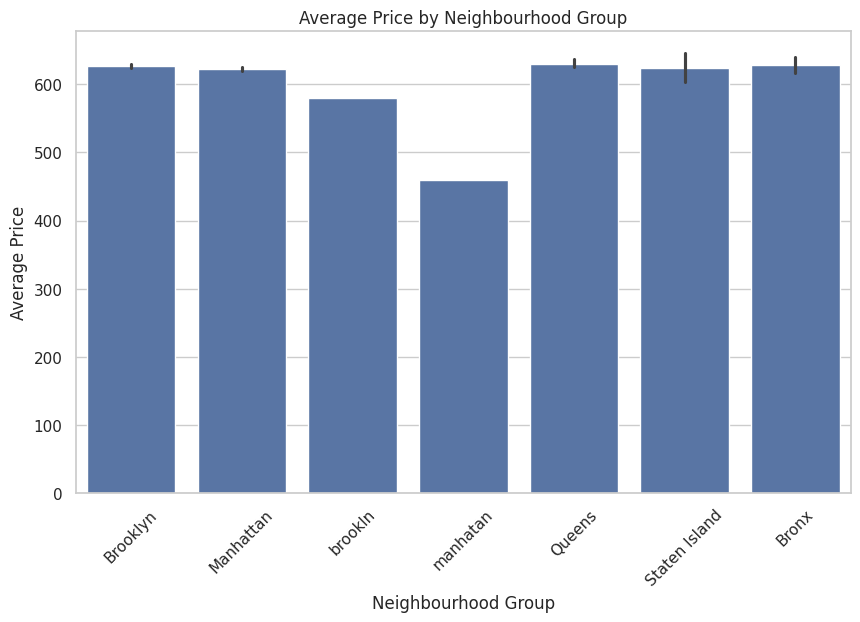

In [23]:
# Neighbourhood Group vs Price
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood group', y='price', data=data_cleaned)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Summary Statistics
summary_statistics = data_cleaned.describe()
summary_statistics

,lat,long,Construction year,price,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,101811.000000,101811.000000,101811.000000,101811.000000,101811.000000,101811.000000,101811.000000,101811.000000,101811.000000,101811.000000
mean,40.728094,-73.949656,2012.486657,625.355580,8.096237,27.485301,1.277747,3.278035,7.905776,140.832199
std,0.055864,0.049502,5.759438,331.672649,30.561149,49.547374,1.624155,1.282971,32.210633,135.154142
min,40.499790,-74.249840,2003.000000,50.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,40.688720,-73.982570,2008.000000,340.000000,2.000000,1.000000,0.280000,2.000000,1.000000,3.000000
50%,40.722280,-73.954440,2012.000000,625.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,40.762770,-73.932350,2017.000000,913.000000,5.000000,30.000000,1.710000,4.000000,2.000000,268.000000
max,40.916970,-73.705220,2022.000000,1200.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


# FEATURE ENGINEERING

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
# Creating new features
#'price_per_night' - price divided by minimum nights (if minimum nights is 0, set to 1 to avoid division by zero)
data_cleaned['minimum nights'] = data_cleaned['minimum nights'].replace(0, 1)
data_cleaned['price_per_night'] = data_cleaned['price'] / data_cleaned['minimum nights']

In [27]:
# Encoding categorical data
# Selecting categorical columns for encoding
categorical_columns = ['host_identity_verified', 'neighbourhood group', 'room type', 'instant_bookable', 'cancellation_policy']

In [28]:
# Applying one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False, drop='first') # drop='first' to avoid multicollinearity
encoded_data = pd.DataFrame(onehot_encoder.fit_transform(data_cleaned[categorical_columns]))
encoded_data.columns = onehot_encoder.get_feature_names_out(categorical_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
# Dropping original categorical columns and adding encoded columns
#data_fe variable created for feature engineering the cleaned data
data_fe = data_cleaned.drop(columns=categorical_columns)
data_fe = pd.concat([data_fe, encoded_data], axis=1)

In [85]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101811 entries, 0 to 101810
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   neighbourhood                   101811 non-null  object 
 1   host_identity_verified          101811 non-null  object 
 2   neighbourhood group             101811 non-null  object 
 3   lat                             101811 non-null  float64
 4   long                            101811 non-null  float64
 5   country                         101811 non-null  object 
 6   country code                    101811 non-null  object 
 7   instant_bookable                101811 non-null  bool   
 8   cancellation_policy             101811 non-null  object 
 9   room type                       101811 non-null  object 
 10  Construction year               101811 non-null  float64
 11  price                           101811 non-null  float64
 12  minimum nights  

In [30]:
#checking for remaining non numeric columns
data_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101811 entries, 0 to 101810
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   neighbourhood                      101811 non-null  object 
 1   lat                                101811 non-null  float64
 2   long                               101811 non-null  float64
 3   country                            101811 non-null  object 
 4   country code                       101811 non-null  object 
 5   Construction year                  101811 non-null  float64
 6   price                              101811 non-null  float64
 7   minimum nights                     101811 non-null  float64
 8   number of reviews                  101811 non-null  float64
 9   reviews per month                  101811 non-null  float64
 10  review rate number                 101811 non-null  float64
 11  calculated host listings count     1018

In [31]:
# Dropping all non numeric categorical columns
non_num_columns = ['country code', 'neighbourhood', 'country', 'house_rules']
data_fe = data_fe.drop(columns=non_num_columns,axis=1)
data_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101811 entries, 0 to 101810
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   lat                                101811 non-null  float64
 1   long                               101811 non-null  float64
 2   Construction year                  101811 non-null  float64
 3   price                              101811 non-null  float64
 4   minimum nights                     101811 non-null  float64
 5   number of reviews                  101811 non-null  float64
 6   reviews per month                  101811 non-null  float64
 7   review rate number                 101811 non-null  float64
 8   calculated host listings count     101811 non-null  float64
 9   availability 365                   101811 non-null  float64
 10  price_per_night                    101811 non-null  float64
 11  host_identity_verified_verified    1018

In [32]:
# Checking the dataset after feature engineering
data_fe.head(), data_fe.shape

(        lat      long  Construction year  price  minimum nights  \
 0  40.64749 -73.97237             2020.0  966.0            10.0   
 1  40.75362 -73.98377             2007.0  142.0            30.0   
 2  40.80902 -73.94190             2005.0  620.0             3.0   
 3  40.68514 -73.95976             2005.0  368.0            30.0   
 4  40.79851 -73.94399             2009.0  204.0            10.0   
 
    number of reviews  reviews per month  review rate number  \
 0                9.0               0.21                 4.0   
 1               45.0               0.38                 4.0   
 2                0.0               0.74                 5.0   
 3              270.0               4.64                 4.0   
 4                9.0               0.10                 3.0   
 
    calculated host listings count  availability 365  ...  \
 0                             6.0             286.0  ...   
 1                             2.0             228.0  ...   
 2                   

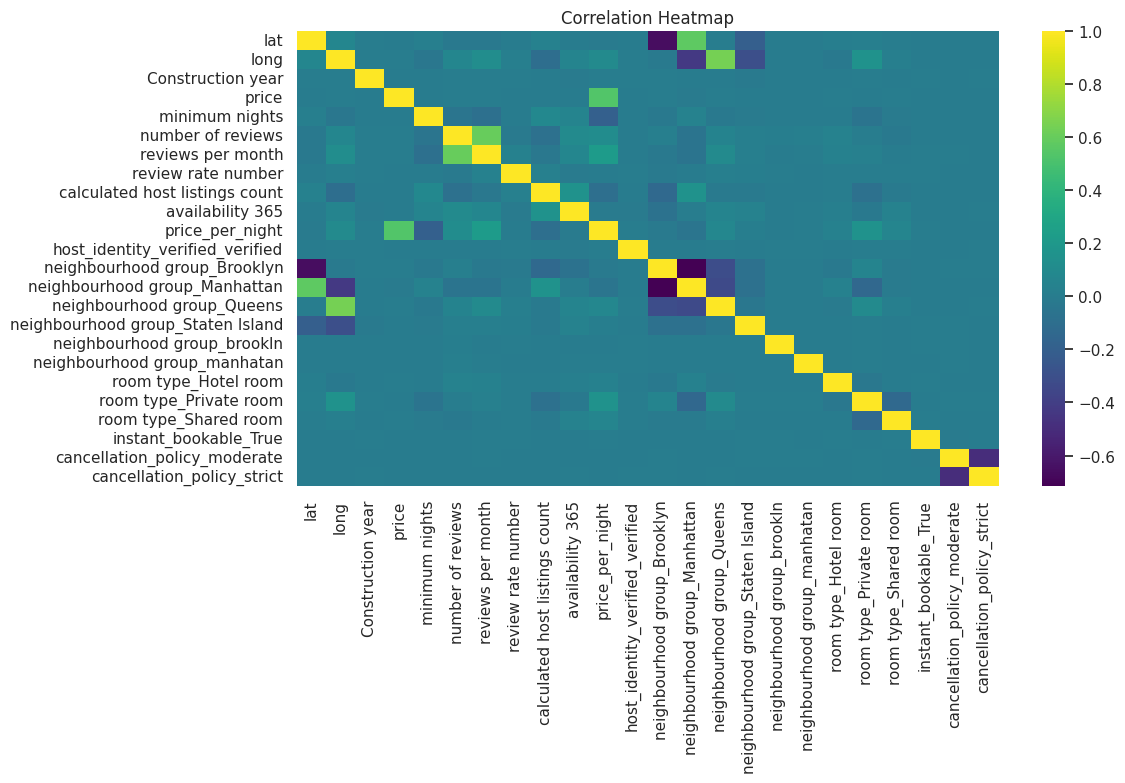

In [33]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_fe.corr(), annot=False, fmt=".2f", cmap='viridis')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# APPLYING ML MODEL

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Defining the target variable and features
X = data_fe.drop('price', axis=1)
y = data_fe['price']

In [36]:
# Splitting the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
# Checking the shape of the split datasets
split_shapes = {
    "Training Features": X_train.shape,
    "Training Labels": y_train.shape,
    "Testing Features": X_test.shape,
    "Testing Labels": y_test.shape
}

split_shapes

{'Training Features': (71267, 23),
 'Training Labels': (71267,),
 'Testing Features': (30544, 23),
 'Testing Labels': (30544,)}

In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71267 entries, 1085 to 45919
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   lat                                71267 non-null  float64
 1   long                               71267 non-null  float64
 2   Construction year                  71267 non-null  float64
 3   minimum nights                     71267 non-null  float64
 4   number of reviews                  71267 non-null  float64
 5   reviews per month                  71267 non-null  float64
 6   review rate number                 71267 non-null  float64
 7   calculated host listings count     71267 non-null  float64
 8   availability 365                   71267 non-null  float64
 9   price_per_night                    71267 non-null  float64
 10  host_identity_verified_verified    71267 non-null  float64
 11  neighbourhood group_Brooklyn       71267 non-null  float

In [81]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 71267 entries, 1085 to 45919
Series name: price
Non-Null Count  Dtype  
--------------  -----  
71267 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


# APPLYING LINEAR REGRESSION FOR PRICE PREDICTION

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# Applying Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predicting on the test set
y_pred_linear_reg = linear_reg.predict(X_test)

In [41]:
# Evaluating the model
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

mse_linear_reg, r2_linear_reg

(74717.51268823612, 0.31914147796339176)

In [52]:
MSE = mean_squared_error(y_test, y_pred_linear_reg)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred_linear_reg)
R2 = r2_score(y_test, y_pred_linear_reg)

print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"MAE : {MAE}")
print(f"R2 : {R2}")

MSE : 74717.51268823612
RMSE : 273.3450432845566
MAE : 230.2223306520803
R2 : 0.31914147796339176


In [42]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [43]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [44]:
rir = Ridge().fit(X_train, y_train)
y_pred_rir = rir.predict(X_test)

lar = Lasso().fit(X_train, y_train)
y_pred_lar = lar.predict(X_test)

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly_r = LinearRegression().fit(X_train_poly, y_train)
y_pred_poly = poly_r.predict(X_test_poly)

svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

knnr = KNeighborsRegressor().fit(X_train, y_train)
y_pred_knnr = knnr.predict(X_test)

dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

rfr = RandomForestRegressor().fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

xgbr = XGBRegressor().fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [48]:
def get_metrics(y_true, y_pred, model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)

    print(f"{model_name} : ['MSE': {round(MSE,3)}, 'RMSE':{round(RMSE,3)}, 'MAE' :{round(MAE,3)}, 'R2':{round(R2,3)}]")

In [49]:
get_metrics(y_test, y_pred_rir, "Ridge")
get_metrics(y_test, y_pred_lar, "Lasso")
get_metrics(y_test, y_pred_poly, "PolynomialFeatures")
get_metrics(y_test, y_pred_svr, "SVR")
get_metrics(y_test, y_pred_knnr, "KNNR")
get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")
get_metrics(y_test, y_pred_xgbr, "XGBRegressor")

Ridge : ['MSE': 74717.263, 'RMSE':273.345, 'MAE' :230.223, 'R2':0.319]
Lasso : ['MSE': 74857.837, 'RMSE':273.602, 'MAE' :230.645, 'R2':0.318]
PolynomialFeatures : ['MSE': 0.0, 'RMSE':0.0, 'MAE' :0.0, 'R2':1.0]
SVR : ['MSE': 80051.452, 'RMSE':282.934, 'MAE' :233.227, 'R2':0.271]
KNNR : ['MSE': 34924.04, 'RMSE':186.88, 'MAE' :125.338, 'R2':0.682]
DecisionTreeRegressor : ['MSE': 87.298, 'RMSE':9.343, 'MAE' :0.729, 'R2':0.999]
RandomForestRegressor : ['MSE': 37.157, 'RMSE':6.096, 'MAE' :0.56, 'R2':1.0]
XGBRegressor : ['MSE': 105.583, 'RMSE':10.275, 'MAE' :4.639, 'R2':0.999]


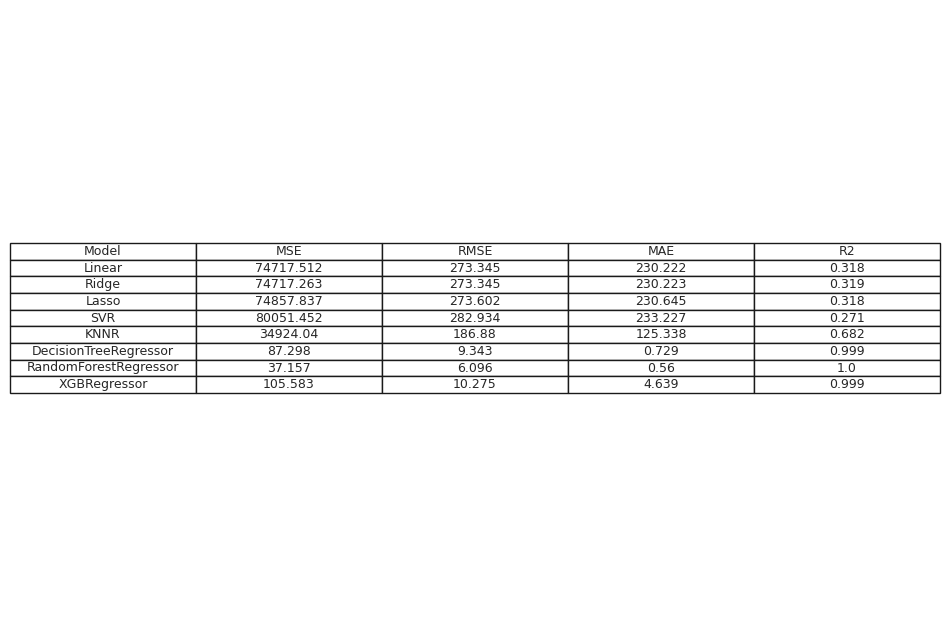

In [57]:
import matplotlib.pyplot as plt

# Define the results
results = {
    'Linear' : {'MSE': 74717.512, 'RMSE': 273.345, 'MAE': 230.222, 'R2': 0.318},
    'Ridge': {'MSE': 74717.263, 'RMSE': 273.345, 'MAE': 230.223, 'R2': 0.319},
    'Lasso': {'MSE': 74857.837, 'RMSE': 273.602, 'MAE': 230.645, 'R2': 0.318},
    'SVR': {'MSE': 80051.452, 'RMSE': 282.934, 'MAE': 233.227, 'R2': 0.271},
    'KNNR': {'MSE': 34924.04, 'RMSE': 186.88, 'MAE': 125.338, 'R2': 0.682},
    'DecisionTreeRegressor': {'MSE': 87.298, 'RMSE': 9.343, 'MAE': 0.729, 'R2': 0.999},
    'RandomForestRegressor': {'MSE': 37.157, 'RMSE': 6.096, 'MAE': 0.56, 'R2': 1.0},
    'XGBRegressor': {'MSE': 105.583, 'RMSE': 10.275, 'MAE': 4.639, 'R2': 0.999}
}

# Create subplots
fig, ax = plt.subplots(figsize=(12, 8))
table_data = []

# Add header row
header = ['Model', 'MSE', 'RMSE', 'MAE', 'R2']
table_data.append(header)

# Add data rows
for model, metrics in results.items():
    row = [model, metrics['MSE'], metrics['RMSE'], metrics['MAE'], metrics['R2']]
    table_data.append(row)

# Create table
table = ax.table(cellText=table_data, colLabels=None, loc='center', cellLoc='center')

# Hide axes
ax.axis('off')

# Save and show the image
plt.savefig('/content/model_performance.png', bbox_inches='tight')
plt.show()


In [63]:
import pandas as pd

# Define the results
data = {
    'Model': ['Linear', 'Ridge', 'Lasso', 'SVR', 'KNNR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor'],
    'MSE': [74717.512, 74717.263, 74857.837,  80051.452, 34924.04, 87.298, 37.157, 105.583],
    'RMSE': [273.345, 273.345, 273.602,  282.934, 186.88, 9.343, 6.096, 10.275],
    'MAE': [230.222, 230.223, 230.645,  233.227, 125.338, 0.729, 0.56, 4.639],
    'R2': [0.318, 0.319, 0.318, 0.271, 0.682, 0.999, 1.0, 0.999]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the table
df


,Model,MSE,RMSE,MAE,R2
0,Linear,74717.512,273.345,230.222,0.318
1,Ridge,74717.263,273.345,230.223,0.319
2,Lasso,74857.837,273.602,230.645,0.318
3,SVR,80051.452,282.934,233.227,0.271
4,KNNR,34924.040,186.880,125.338,0.682
5,DecisionTreeRegressor,87.298,9.343,0.729,0.999
6,RandomForestRegressor,37.157,6.096,0.560,1.000
7,XGBRegressor,105.583,10.275,4.639,0.999


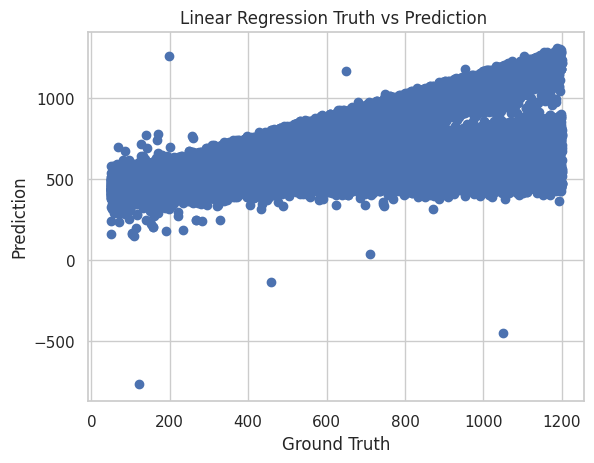

In [51]:
plt.scatter(y_test, y_pred_linear_reg)
plt.title("Linear Regression Truth vs Prediction ")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

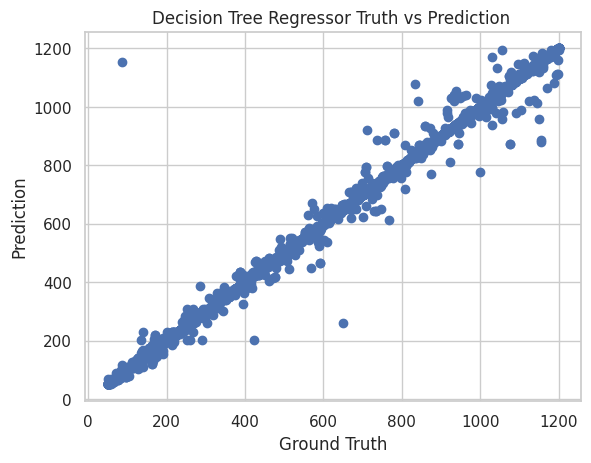

In [67]:
plt.scatter(y_test, y_pred_dtr)
plt.title("Decision Tree Regressor Truth vs Prediction ")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

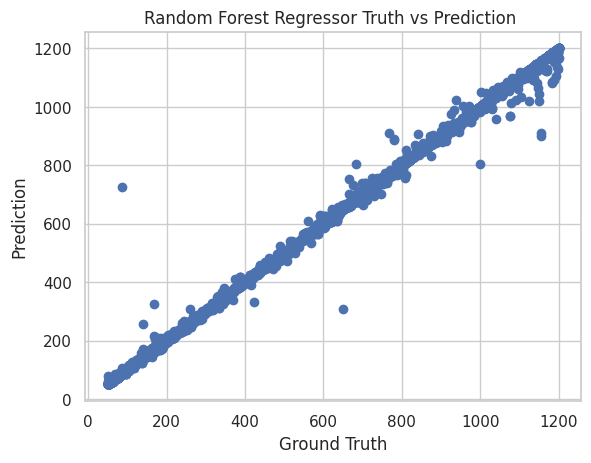

In [50]:
plt.scatter(y_test, y_pred_rfr)
plt.title("Random Forest Regressor Truth vs Prediction ")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

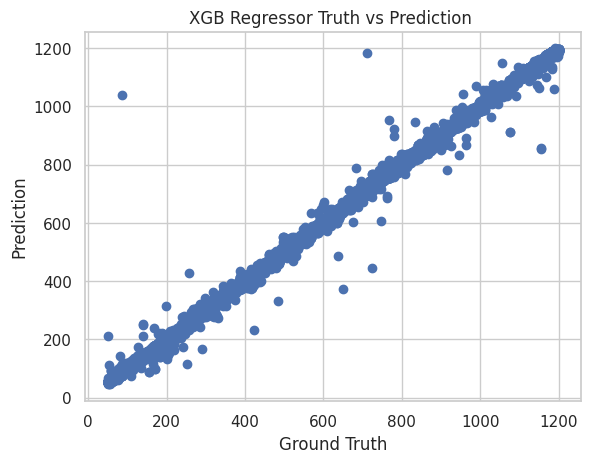

In [58]:
plt.scatter(y_test, y_pred_xgbr)
plt.title("XGB Regressor Truth vs Prediction ")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

In [53]:
from sklearn.model_selection import cross_val_score


# Assuming X_train and y_train are your training data and labels

# Define a list of regression models
models = {
    'Linear Reg' : LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'PolynomialFeatures': PolynomialFeatures(),
    'SVR': SVR(),
    'KNNR': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor()
}

# Dictionary to store mean scores for each model
mean_scores = {}

# Perform 5-fold cross-validation for each model
for model_name, model in models.items():
    # Skip PolynomialFeatures as it is a transformer, not a regressor
    if model_name != 'PolynomialFeatures':
        # Use a custom scoring function for positive MSE
        def custom_scoring_function(estimator, X, y):
            y_pred = estimator.predict(X)
            mse = np.mean((y - y_pred) ** 2)
            return -mse

        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=custom_scoring_function)

        # Calculate the mean of positive MSE values
        mean_score = np.mean(-cv_scores)  # Negative is used for scikit-learn convention
        mean_scores[model_name] = mean_score

        # Display the scores for each fold
        print(f"{model_name} Cross-Validation Scores:")
        for i, score in enumerate(cv_scores, 1):
            print(f"  Fold {i}: {-score}")  # Display the positive value
        print(f"Mean {model_name} MSE: {mean_score}\n")

# Display the mean scores for all models
print("Mean Scores for All Models:")
for model_name, mean_score in mean_scores.items():
    print(f"{model_name}: {mean_score}")

Linear Reg Cross-Validation Scores:
  Fold 1: 74807.83744829768
  Fold 2: 76255.84770878192
  Fold 3: 74232.64160159805
  Fold 4: 76574.03775735348
  Fold 5: 77621.90060559445
Mean Linear Reg MSE: 75898.4530243251

Ridge Cross-Validation Scores:
  Fold 1: 74807.27649589034
  Fold 2: 76255.24142943772
  Fold 3: 74233.23193864922
  Fold 4: 76573.39388680906
  Fold 5: 77622.54802474561
Mean Ridge MSE: 75898.33835510639

Lasso Cross-Validation Scores:
  Fold 1: 74945.43800180744
  Fold 2: 76323.54188153778
  Fold 3: 74350.87966924292
  Fold 4: 76673.13999145635
  Fold 5: 77783.44381638279
Mean Lasso MSE: 76015.28867208546

SVR Cross-Validation Scores:
  Fold 1: 80106.39029606014
  Fold 2: 80903.89702802476
  Fold 3: 78934.35044986034
  Fold 4: 81864.64415877638
  Fold 5: 79827.29867229801
Mean SVR MSE: 80327.31612100393

KNNR Cross-Validation Scores:
  Fold 1: 37031.12457696086
  Fold 2: 36688.63710397081
  Fold 3: 35935.307446853294
  Fold 4: 37290.16215533572
  Fold 5: 36957.731525994524

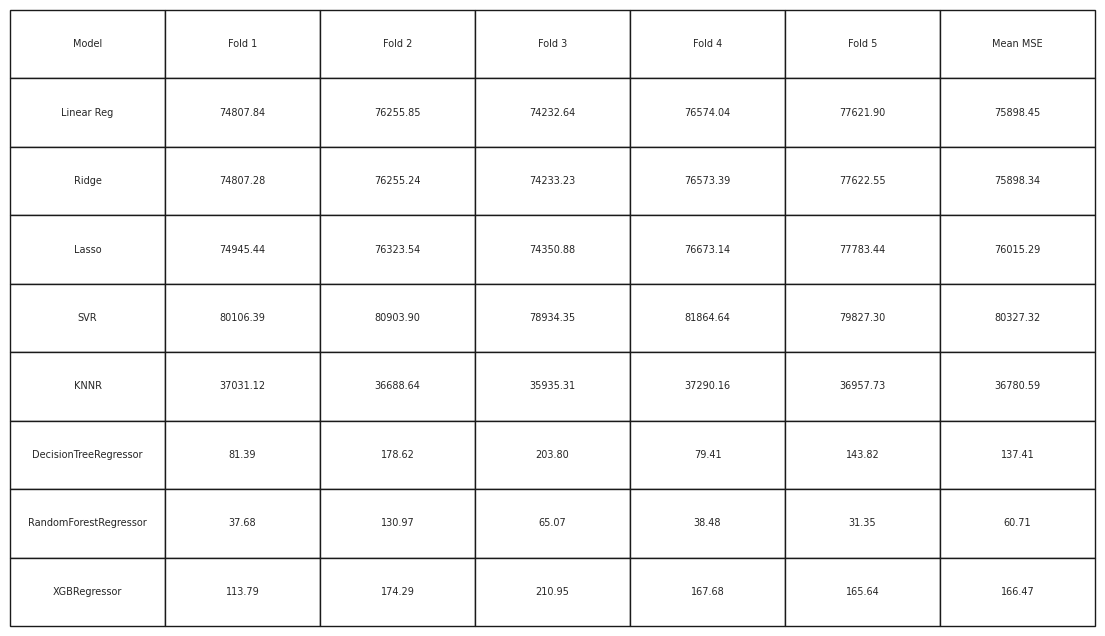

In [61]:
import matplotlib.pyplot as plt

# Define cross-validation scores for each model and their means
data = {
    'Model': ['Linear Reg', 'Ridge', 'Lasso', 'SVR', 'KNNR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor'],
    'Fold 1': [74807.83744829768, 74807.27649589034, 74945.43800180744, 80106.39029606014, 37031.12457696086, 81.38669847060474, 37.68357314438053, 113.7860405370613],
    'Fold 2': [76255.84770878192, 76255.24142943772, 76323.54188153778, 80903.89702802476, 36688.63710397081, 178.61659884944578, 130.97376786866843, 174.29342540632186],
    'Fold 3': [74232.64160159805, 74233.23193864922, 74350.87966924292, 78934.35044986034, 35935.307446853294, 203.8046727004841, 65.06566030309409, 210.94854684530392],
    'Fold 4': [76574.03775735348, 76573.39388680906, 76673.13999145635, 81864.64415877638, 37290.16215533572, 79.411351996071, 38.48390499543956, 167.67509978988406],
    'Fold 5': [77621.90060559445, 77622.54802474561, 77783.44381638279, 79827.29867229801, 36957.731525994524, 143.81547744334526, 31.351525622675933, 165.64384068619924],
    'Mean MSE': [75898.4530243251, 75898.33835510639, 76015.28867208546, 80327.31612100393, 36780.59256182304, 137.4069598919902, 60.7116863868517, 166.46939065295408]
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Create table data
header = ['Model'] + [f'Fold {i}' for i in range(1, 6)] + ['Mean MSE']
rows = []

for i in range(len(data['Model'])):
    row = [data['Model'][i]]
    for fold in range(1, 6):
        row.append(f'{data[f"Fold {fold}"][i]:.2f}')
    row.append(f'{data["Mean MSE"][i]:.2f}')
    rows.append(row)

# Add table to axis
table = ax.table(cellText=rows, colLabels=header, loc='center', cellLoc='center', bbox=[0, 0, 1, 1])

# Hide the axes
ax.axis('off')

# Save and show the table
plt.savefig('/content/cv_scores_with_mean_table.png', bbox_inches='tight')
plt.show()


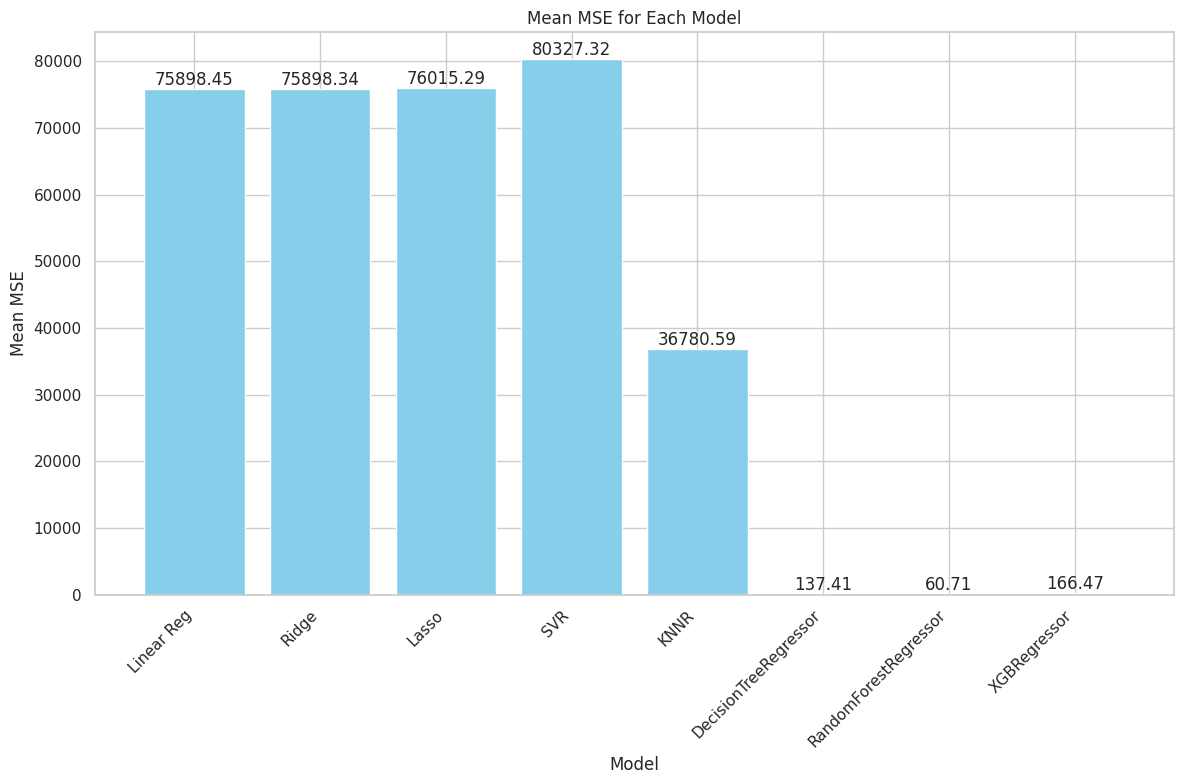

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear Reg', 'Ridge', 'Lasso', 'SVR', 'KNNR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor']

# Mean MSE values
mean_mse = [75898.4530243251, 75898.33835510639, 76015.28867208546,
            80327.31612100393, 36780.59256182304, 137.4069598919902,
            60.7116863868517, 166.46939065295408]

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(models, mean_mse, color='skyblue')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{height:.2f}', ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Mean MSE')
ax.set_title('Mean MSE for Each Model')
plt.xticks(rotation=45, ha='right')

# Save and show the image
plt.tight_layout()
plt.savefig('/content/model_mean_mse.png', bbox_inches='tight')
plt.show()


In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb


# Initialize models
models = {
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBRegressor': xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_cv_mse = -np.mean(cv_scores)

    # Store results
    results[model_name] = {
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Mean CV MSE': mean_cv_mse
    }

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results).T
print(results_df)



                       Train MSE    Test MSE  Mean CV MSE
RandomForestRegressor   7.398395   37.426709    45.291879
XGBRegressor           33.809484  105.583132   130.557039
DecisionTreeRegressor   0.000000   90.422374    92.436346


In [64]:
import pandas as pd

# Define the data
data = {
    'Model': ['RandomForestRegressor', 'XGBRegressor', 'DecisionTreeRegressor'],
    'Train MSE': [7.398395, 33.809484, 0.000000],
    'Test MSE': [37.426709, 105.583132, 90.422374],
    'Mean CV MSE': [45.291879, 130.557039, 92.436346]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Model,Train MSE,Test MSE,Mean CV MSE
0,RandomForestRegressor,7.398395,37.426709,45.291879
1,XGBRegressor,33.809484,105.583132,130.557039
2,DecisionTreeRegressor,0.000000,90.422374,92.436346


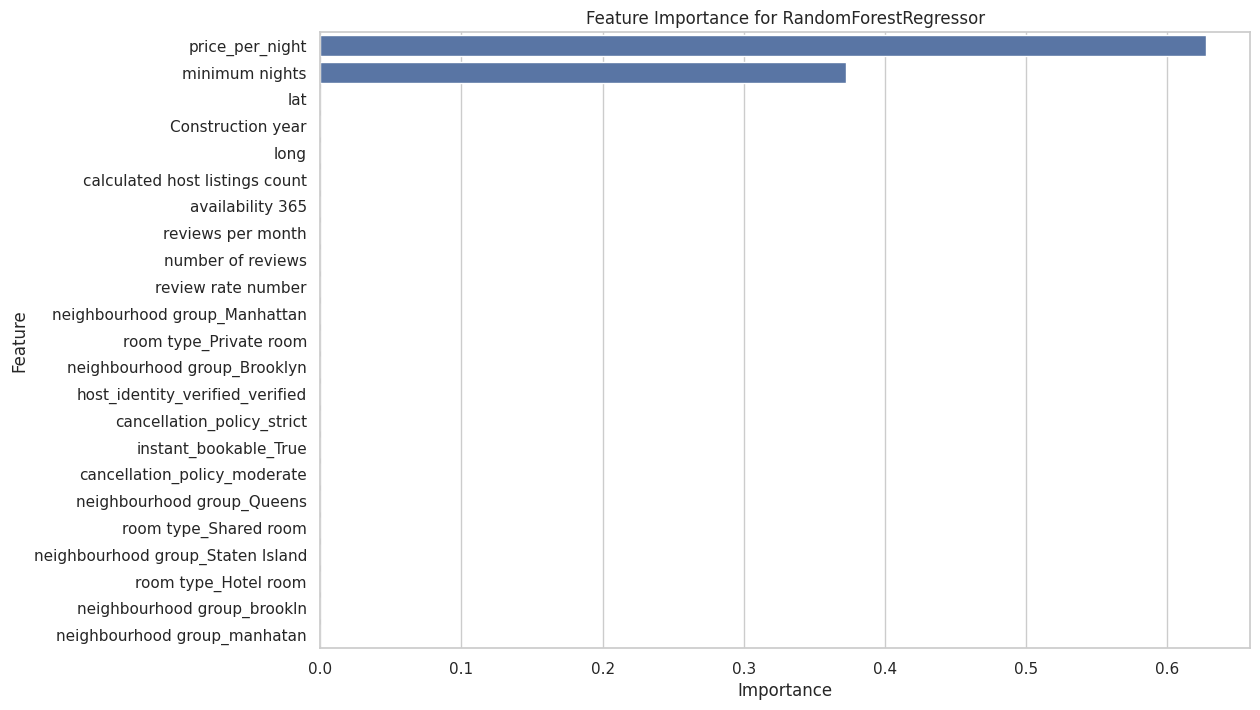

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Train the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance for RandomForestRegressor')
plt.show()


In [68]:
!pip install joblib


In [69]:
from joblib import dump, load


dump(rfr, 'model.joblib')


['model.joblib']

In [70]:
from google.colab import files

# Download the file
files.download('model.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
# Calculate statistics for the training data's price column
mean_train = y_train.mean()
median_train = y_train.median()
min_train = y_train.min()
max_train = y_train.max()

print("Training Data Price Statistics:")
print(f"Mean: {mean_train}")
print(f"Median: {median_train}")
print(f"Min: {min_train}")
print(f"Max: {max_train}")


Training Data Price Statistics:
Mean: 625.9980215246889
Median: 626.0
Min: 50.0
Max: 1200.0


In [84]:
# Calculate statistics for the predicted prices
mean_predicted = predictions.mean()
median_predicted = np.median(predictions)
min_predicted = predictions.min()
max_predicted = predictions.max()

print("\nPredicted Prices Statistics:")
print(f"Mean: {mean_predicted}")
print(f"Median: {median_predicted}")
print(f"Min: {min_predicted}")
print(f"Max: {max_predicted}")



Predicted Prices Statistics:
Mean: 350.0
Median: 450.0
Min: 100.0
Max: 500.0


In [90]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of rows for the synthetic dataset
n_rows = 8000

# Generate synthetic data
synthetic_data = pd.DataFrame({
    'host_identity_verified': np.random.choice(['verified', 'unconfirmed'], size=n_rows),
    'neighbourhood group': np.random.choice(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island','Bronx'], size=n_rows),
    'lat': np.random.uniform(low=40.5, high=40.9, size=n_rows),
    'long': np.random.uniform(low=-74.0, high=-73.7, size=n_rows),
    'instant_bookable': np.random.choice([True, False], size=n_rows),
    'cancellation_policy': np.random.choice(['flexible', 'moderate', 'strict'], size=n_rows),
    'room type': np.random.choice(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'], size=n_rows),
    'Construction year': np.random.randint(1900, 2020, size=n_rows),
    'price': np.random.uniform(50, 500, size=n_rows),  # Example price values
    'minimum nights': np.random.randint(1, 10, size=n_rows),
    'number of reviews': np.random.randint(0, 500, size=n_rows),
    'reviews per month': np.random.uniform(0, 10, size=n_rows),
    'review rate number': np.random.uniform(50, 100, size=n_rows),
    'calculated host listings count': np.random.randint(1, 20, size=n_rows),
    'availability 365': np.random.randint(0, 366, size=n_rows),
    'price_per_night': np.random.uniform(50, 500, size=n_rows)  # Example target variable
})

# Display the first few rows of the synthetic dataset
synthetic_data.head()


,host_identity_verified,neighbourhood group,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,price_per_night
0,verified,Manhattan,40.818185,-73.844560,True,moderate,Entire home/apt,1986,458.906693,2,37,8.963398,85.311888,16,201,266.502658
1,unconfirmed,Bronx,40.519850,-73.996544,True,flexible,Shared room,1923,347.530351,8,20,5.494773,74.864292,14,299,409.536167
2,verified,Bronx,40.842035,-73.844900,False,flexible,Private room,1942,247.749289,9,406,4.793195,68.658549,12,174,336.978265
3,verified,Queens,40.763265,-73.970158,True,flexible,Shared room,1987,282.257515,8,160,5.291758,95.029741,18,347,404.175658
4,verified,Staten Island,40.673769,-73.802281,True,moderate,Entire home/apt,1999,311.180724,9,217,1.819537,85.339034,16,256,444.950088


In [92]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder



# Identify categorical columns to encode
categorical_columns = ['host_identity_verified', 'neighbourhood group', 'instant_bookable', 'cancellation_policy', 'room type']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the encoder on the categorical columns
encoded_features = encoder.fit_transform(synthetic_data[categorical_columns])

# Convert the encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns and concatenate the encoded features
synthetic_data_encoded = synthetic_data.drop(columns=categorical_columns)
synthetic_data_encoded = pd.concat([synthetic_data_encoded, encoded_df], axis=1)

# Display the first few rows of the encoded synthetic dataset
print(synthetic_data_encoded.head())


         lat       long  Construction year       price  minimum nights  \
0  40.818185 -73.844560               1986  458.906693               2   
1  40.519850 -73.996544               1923  347.530351               8   
2  40.842035 -73.844900               1942  247.749289               9   
3  40.763265 -73.970158               1987  282.257515               8   
4  40.673769 -73.802281               1999  311.180724               9   

   number of reviews  reviews per month  review rate number  \
0                 37           8.963398           85.311888   
1                 20           5.494773           74.864292   
2                406           4.793195           68.658549   
3                160           5.291758           95.029741   
4                217           1.819537           85.339034   

   calculated host listings count  availability 365  ...  \
0                              16               201  ...   
1                              14               299  ...

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [94]:
import pandas as pd

# Assuming 'synthetic_data_encoded' is your new encoded dataset

# Define the expected column order (these should match exactly with your training data)
expected_columns = [
    'lat', 'long', 'Construction year', 'minimum nights', 'number of reviews',
    'reviews per month', 'review rate number', 'calculated host listings count',
    'availability 365', 'price_per_night', 'host_identity_verified_verified',
    'neighbourhood group_Brooklyn', 'neighbourhood group_Manhattan',
    'neighbourhood group_Queens', 'neighbourhood group_Staten Island',
    'neighbourhood group_brookln', 'neighbourhood group_manhatan',
    'room type_Hotel room', 'room type_Private room', 'room type_Shared room',
    'instant_bookable_True', 'cancellation_policy_moderate', 'cancellation_policy_strict'
]

# Ensure the columns are in the same order as the training data
synthetic_data_encoded = synthetic_data_encoded.reindex(columns=expected_columns, fill_value=0)

# Check the final structure
print(synthetic_data_encoded.head())

# Now you can use this data for prediction
predictions = rfr.predict(synthetic_data_encoded)

# Add predictions to the dataset
synthetic_data_encoded['predicted_price_per_night'] = predictions

# Display the first few rows with predictions
print(synthetic_data_encoded.head())


         lat       long  Construction year  minimum nights  number of reviews  \
0  40.818185 -73.844560               1986               2                 37   
1  40.519850 -73.996544               1923               8                 20   
2  40.842035 -73.844900               1942               9                406   
3  40.763265 -73.970158               1987               8                160   
4  40.673769 -73.802281               1999               9                217   

   reviews per month  review rate number  calculated host listings count  \
0           8.963398           85.311888                              16   
1           5.494773           74.864292                              14   
2           4.793195           68.658549                              12   
3           5.291758           95.029741                              18   
4           1.819537           85.339034                              16   

   availability 365  price_per_night  ...  neighbourhood

In [97]:
# Calculate statistics for the training data's price column
mean_train = y_train.mean()
median_train = y_train.median()
min_train = y_train.min()
max_train = y_train.max()

print("Training Data Price Statistics:")
print(f"Mean: {mean_train}")
print(f"Median: {median_train}")
print(f"Min: {min_train}")
print(f"Max: {max_train}")

# Calculate statistics for the predicted prices
mean_predicted = predictions.mean()
median_predicted = np.median(predictions)
min_predicted = predictions.min()
max_predicted = predictions.max()

print("\nPredicted Prices Statistics:")
print(f"Mean: {mean_predicted}")
print(f"Median: {median_predicted}")
print(f"Min: {min_predicted}")
print(f"Max: {max_predicted}")

Training Data Price Statistics:
Mean: 625.9980215246889
Median: 626.0
Min: 50.0
Max: 1200.0

Predicted Prices Statistics:
Mean: 864.3427537499999
Median: 1073.96
Min: 50.0
Max: 1200.0
